In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
import pickle

In [2]:
data=pd.read_csv('evdataset.csv')
data.head()

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


In [3]:
data.describe()

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1526.257732,343.247423,247.500000,293.144330,502.706186,315.721649,393.608247,7.870619,177.015464,345.592784,...,44.396907,528.711340,4702.087629,1880.061856,1620.706186,2899.829897,2633.139175,619.257732,507.190722,5.536082
std,154.958947,92.173078,75.553656,84.558652,138.297461,98.967440,117.054175,3.168385,38.110213,101.384377,...,15.617918,256.219808,378.219208,68.719346,152.249425,238.567154,415.592250,199.938995,192.411664,1.530768
min,1116.000000,135.000000,95.000000,115.000000,210.000000,125.000000,160.000000,2.800000,125.000000,135.000000,...,24.000000,150.000000,3631.000000,1622.000000,1378.000000,2322.000000,1300.000000,245.000000,171.000000,4.000000
25%,1437.250000,280.000000,185.000000,230.000000,395.000000,230.000000,295.000000,5.400000,150.000000,265.000000,...,34.000000,312.500000,4469.750000,1837.000000,1519.750000,2764.000000,2310.000000,497.000000,405.000000,5.000000
50%,1557.500000,350.000000,250.000000,300.000000,515.000000,320.000000,400.000000,7.400000,160.000000,352.500000,...,46.000000,470.000000,4694.000000,1887.000000,1614.000000,2900.000000,2660.000000,572.500000,472.500000,5.000000
75%,1648.750000,403.750000,295.000000,345.000000,595.000000,375.000000,470.000000,9.650000,200.000000,410.000000,...,51.750000,650.000000,4959.000000,1920.750000,1652.000000,3082.500000,2968.750000,645.000000,558.250000,5.000000
max,1757.000000,595.000000,470.000000,535.000000,895.000000,615.000000,740.000000,19.100000,261.000000,640.000000,...,110.000000,1170.000000,5391.000000,2011.000000,1927.000000,3430.000000,3500.000000,1121.000000,1410.000000,9.000000


In [4]:
#Finding correlation 

corr_matrix = data.corr()
corr_matrix["Electric Range"].sort_values(ascending=False)

ValueError: could not convert string to float: 'Genesis'

In [5]:
#Checking for null values

data.nunique()

id                             194
Make                            34
link                           194
City - Cold Weather             64
Highway - Cold Weather          52
Combined - Cold Weather         57
City - Mild Weather             82
Highway - Mild Weather          59
Combined - Mild Weather         67
Acceleration 0 - 100 km/h       72
Top Speed                       29
Electric Range                  66
Total Power                     65
Total Torque                    69
Drive                            3
Battery Capacity                49
Charge Power                     5
Charge Speed                    37
Fastcharge Speed                69
Length                          74
Width                           51
Height                          76
Wheelbase                       54
Gross Vehicle Weight (GVWR)    122
Max. Payload                   110
Cargo Volume                    74
Seats                            5
dtype: int64

In [6]:
data.shape

(194, 27)

In [7]:
#Converting categorical data into numerical data

data.replace({'Drive':{'Rear':2,'Front':0,'AWD':1}},inplace=True)

In [8]:
#Dropping few features 

cols_to_use=['City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather','Combined - Mild Weather','Acceleration 0 - 100 km/h','Top Speed','Electric Range','Total Power','Total Torque','Drive','Battery Capacity','Charge Power','Charge Speed','Fastcharge Speed','Gross Vehicle Weight (GVWR)','Max. Payload','Cargo Volume','Width','Length']
data=data[cols_to_use]
data.head()

,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,...,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Width,Length
0,390,275,330,575,355,445,7.8,185,390,168,...,2,77.4,11.0,49,1020,2495,595,432,1890,4515
1,330,235,280,480,300,375,6.2,160,330,215,...,1,69.7,11.0,46,470,2580,480,495,1834,4684
2,400,305,350,580,385,470,3.2,260,415,500,...,1,93.4,11.0,46,1020,2880,575,366,1966,4963
3,445,340,390,670,440,540,5.7,190,470,250,...,2,83.9,11.0,54,730,2605,555,470,1852,4783
4,440,320,380,660,415,520,7.9,160,450,150,...,2,82.0,11.0,55,570,2300,447,385,1809,4261


In [9]:
data.isna().sum()

City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Width                          0
Length                         0
dtype: int64

In [10]:
x=data.drop(['Electric Range','City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather',
'Combined - Mild Weather'],axis=1)
y=data[['Electric Range','City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather',
'Combined - Mild Weather']]

In [11]:
x.shape

(194, 14)

In [12]:
x

,Acceleration 0 - 100 km/h,Top Speed,Total Power,Total Torque,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Width,Length
0,7.8,185,168,350,2,77.4,11.0,49,1020,2495,595,432,1890,4515
1,6.2,160,215,520,1,69.7,11.0,46,470,2580,480,495,1834,4684
2,3.2,260,500,850,1,93.4,11.0,46,1020,2880,575,366,1966,4963
3,5.7,190,250,430,2,83.9,11.0,54,730,2605,555,470,1852,4783
4,7.9,160,150,310,2,82.0,11.0,55,570,2300,447,385,1809,4261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2.8,260,560,1050,1,93.4,11.0,45,980,2870,575,366,1966,4963
190,7.9,160,150,310,2,82.0,11.0,55,570,2280,420,385,1809,4261
191,11.7,135,100,260,0,50.0,7.4,27,310,2440,639,806,1921,4753
192,6.2,180,220,460,1,82.0,11.0,49,500,2715,575,535,1865,4588


In [13]:
#Normalizing the given data

from sklearn import preprocessing
x=preprocessing.normalize(x)

In [14]:
x

array([[1.37978718e-03, 3.27257217e-02, 2.97184932e-02, ...,
        7.64189825e-02, 3.34333049e-01, 7.98684505e-01],
       [1.07919159e-03, 2.78501057e-02, 3.74235795e-02, ...,
        8.61612644e-02, 3.19231836e-01, 8.15311844e-01],
       [5.10145768e-04, 4.14493436e-02, 7.97102762e-02, ...,
        5.83479222e-02, 3.13420806e-01, 7.91204202e-01],
       ...,
       [2.02180966e-03, 2.33285730e-02, 1.72804244e-02, ...,
        1.39280221e-01, 3.31956953e-01, 8.21338572e-01],
       [1.07817561e-03, 3.13018724e-02, 3.82578441e-02, ...,
        9.30361209e-02, 3.24322178e-01, 7.97849949e-01],
       [2.27538052e-03, 2.06852775e-02, 1.59117519e-02, ...,
        9.59478640e-02, 3.05505637e-01, 7.88586424e-01]])

In [15]:
y

,Electric Range,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather
0,390,390,275,330,575,355,445
1,330,330,235,280,480,300,375
2,415,400,305,350,580,385,470
3,470,445,340,390,670,440,540
4,450,440,320,380,660,415,520
...,...,...,...,...,...,...,...
189,400,390,290,340,560,370,450
190,450,440,320,380,660,415,515
191,195,210,140,170,295,170,220
192,400,395,290,340,580,370,460


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
#Using Linear Regression

from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,Y_train)

In [18]:
pickle.dump(reg, open('model.pkl','wb'))

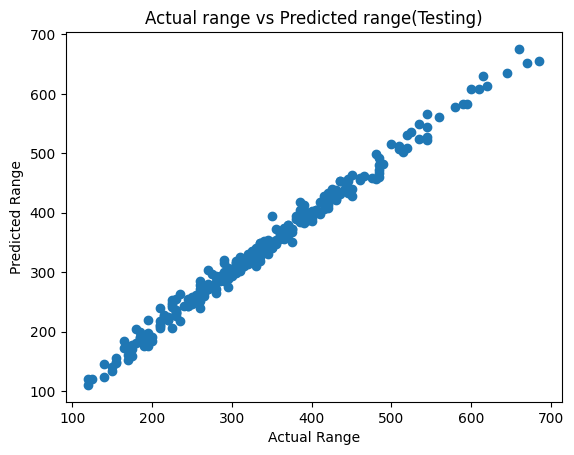

In [19]:
testing_data_prediction=reg.predict(X_test)
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()

In [20]:
mae = mean_absolute_error(Y_test,testing_data_prediction)
mae

8.955062916841145

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=15),
}

forest_reg=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_distribs,n_iter=10,cv=5,scoring="neg_mean_squared_error",
                              random_state=42)
rnd_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FB41A4D390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FB41A4C910>},
                   random_state=42, scoring='neg_mean_squared_error')

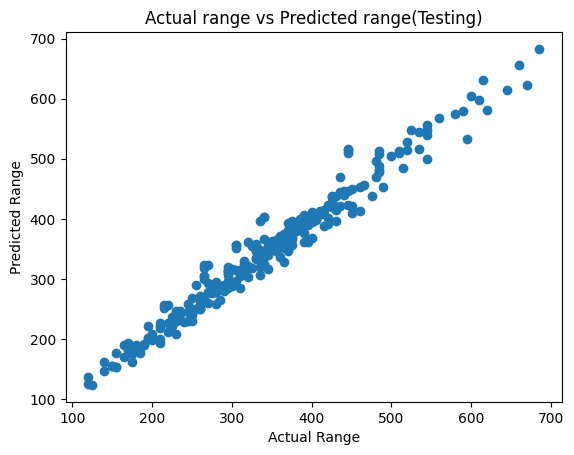

In [22]:
testing_data_prediction1=rnd_search.predict(X_test)
plt.scatter(Y_test,testing_data_prediction1)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()

In [23]:
mae1 = mean_absolute_error(Y_test,testing_data_prediction1)
mae1

14.015206284943128

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid=[
        {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
        {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

rfc=RandomForestClassifier()
grid_search=GridSearchCV(rfc,param_grid,cv=5,scoring="neg_mean_squared_error",
                              return_train_score=True)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
rfc_clf=grid_search.best_estimator_
rfc_clf

RandomForestClassifier(max_features=6, n_estimators=30)

In [26]:
rfc_clf_predictions=rfc_clf.predict(X_test)

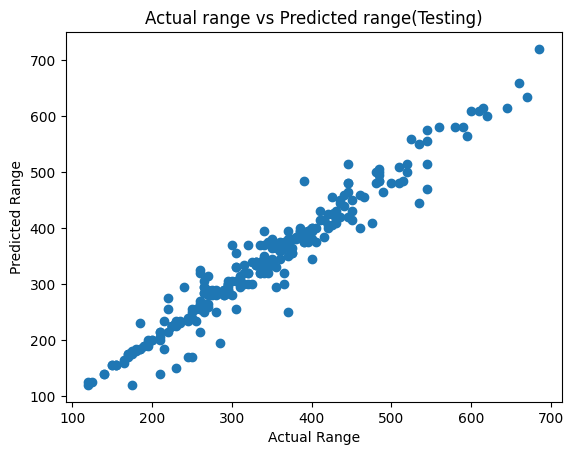

In [27]:
testing_data_prediction2=rfc_clf.predict(X_test)
plt.scatter(Y_test,testing_data_prediction2)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()

In [28]:
mae2 = mean_absolute_error(Y_test,rfc_clf_predictions)
mae2

16.135531135531135

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
testing_data_prediction3=tree_reg.predict(X_test)
mae3 = mean_absolute_error(Y_test,testing_data_prediction3)
mae3

14.505494505494507

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [32]:
testing_data_prediction4=forest_reg.predict(X_test)
mae4 = mean_absolute_error(Y_test,testing_data_prediction4)
mae4

15.524175824175826